In [ ]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir="/content/drive/MyDrive/FaceRecognitionDataset/OriginalImages/"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 36 images belonging to 31 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 111, 111, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                      

In [ ]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
2/2 [==============================] - 14s 692ms/step - loss: 3.9930 - accuracy: 0.0278
Epoch 2/30
2/2 [==============================] - 10s 9s/step - loss: 1.4420 - accuracy: 0.6389
Epoch 3/30
2/2 [==============================] - 7s 401ms/step - loss: 0.9919 - accuracy: 0.7778
Epoch 4/30
2/2 [==============================] - 9s 408ms/step - loss: 0.5658 - accuracy: 1.0000
Epoch 5/30
2/2 [==============================] - 9s 8s/step - loss: 0.2715 - accuracy: 0.9722
Epoch 6/30
2/2 [==============================] - 9s 383ms/step - loss: 0.2608 - accuracy: 0.9722
Epoch 7/30
2/2 [==============================] - 9s 8s/step - loss: 0.1346 - accuracy: 1.0000
Epoch 8/30
2/2 [==============================] - 8s 389ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 9/30
2/2 [==============================] - 10s 663ms/step - loss: 0.0615 - accuracy: 1.0000
Epoch 10/30
2/2 [==============================] - 8s 7s/step - loss: 0.0399 - accuracy: 1.0000
Epoch 11/30
2/2 [===========

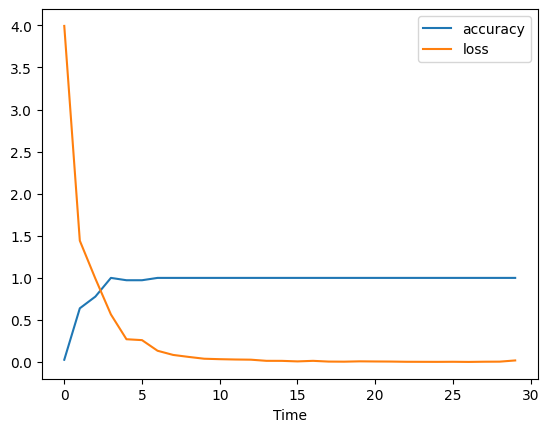

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
def detect_and_draw_face(image_path):
    # Charger l'image en niveaux de gris
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Charger le classificateur de visages pré-entraîné
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Détecter les visages dans l'image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Dessiner un rectangle autour de chaque visage détecté
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 8)

    # Afficher l'image résultante avec les rectangles autour des visages détectés
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    detect_and_draw_face(image_path)
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

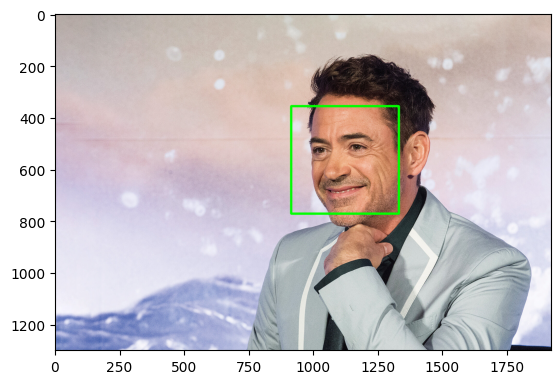

1/1 [==============================] - 0s 56ms/step
Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [ ]:
predict_image("/content/drive/MyDrive/FaceRecognitionDataset/OriginalImages/Robert Downey Jr/Robert Downey Jr_106.jpg")